# Star Cluster Part II - Isochrone Fitting
25.04.22 AstroLab


작성자: Seungwu Yoo

## README

본 notebook은 세 가지 종류의 code cell로 구성되어 있습니다.

- [Mission]: 실습을 위해 직접 값을 수정하고 조작해야 하는 부분


- [Auto]: 실습을 위한 필수적으로 조작할 필요는 없으나 이해하기 쉬운 부분


- [Advanced]: 실습을 위한 백그라운드, 필수적으로 이해하고 조작할 필요없이 실행해도 되는 부분

앞으로 천문학을 더 깊게 공부하고 연구하게 될 분들께 [Advanced]를 바칩니다.

### [Auto] Import the package

In [8]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

import pandas as pd

import read_mist_models

### [Auto] Adjust rcParams

In [9]:
plt.rcParams["font.family"] = 'STIXGeneral'
plt.rcParams['text.usetex'] = False
plt.rcParams["mathtext.fontset"] = 'cm'
plt.rcParams["axes.labelweight"] = "bold"

plt.rcParams.update({'font.size': 60})
plt.rcParams.update({'font.weight': 'normal'})

plt.rcParams.update({'xtick.direction': 'in'})
plt.rcParams.update({'ytick.direction': 'in'})
plt.rcParams.update({'xtick.major.size': 20})
plt.rcParams.update({'xtick.minor.size': 12})
plt.rcParams.update({'ytick.major.size': 20})
plt.rcParams.update({'ytick.minor.size': 12})
plt.rcParams.update({'xtick.major.width': 2})
plt.rcParams.update({'xtick.minor.width': 2})
plt.rcParams.update({'ytick.major.width': 2})
plt.rcParams.update({'ytick.minor.width': 2})
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'axes.linewidth': 8})
plt.rcParams.update({'axes.labelpad': 8})
plt.rcParams.update({'xtick.major.pad': 20})
plt.rcParams.update({'ytick.major.pad': 12})
plt.rcParams.update({'image.origin':'lower'})

### [Advanced] Check Isochrone data

- python은 '!'를 앞에 붙임으로써 linux command를 실행할 수 있습니다.

- ls [directory] : directory에 있는 파일을 나열하는 linux command입니다. 

- Reference: MIST(MESA Isochrones & Stellar Tracks) (http://waps.cfa.harvard.edu/MIST/index.html)

- MIST는 MESA(Modules for Experiment in Stellar Astrophysics) 코드를 활용하여 별의 진화 track을 계산하여 저장한 isochrone 데이터입니다. 상단의 링크를 접속하여 다운로드 가능합니다. 

- MIST는 다양한 filter에 대한 isochrone을 'Synthetic Photometry'에서 제공합니다. 실습에서 제공하는 데이터는 SDSS의 u,g,r,i,z photometry이지만, 만약 다른 filter에 대한 isochrone이 필요하다면, 상단의 링크에서 직접 다운로드 가능합니다.

- 제공한 '.iso.cmd' 형태의 isochrone 데이터는 MIST에서 제공하는 'read_mist_models.py'의 함수들을 통해 읽을 수 있습니다. 

- Reference : read_mist_models.py (https://github.com/jieunchoi/MIST_codes/blob/master/scripts/read_mist_models.py)

In [7]:
!ls ./MIST_v1.2_vvcrit0.0_SDSSugriz/

MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd


### [Advanced] Metalicity of Isochrone data

- Isochrone은 metalicity의 영향을 받습니다. 

- MIST는 Fe의 Hydrogen 대비 abundance ([Fe/H])를 통해 정의한 metalicity를 사용하며, log[Fe/H]가 -4.0부터 0.5까지 0.25간격으로 데이터를 제공합니다.

- data의 파일 이름에 feh_[m/p][value]가 있는데, 이 값은 isochrone을 계산하는데 쓰인 log[Fe/H]값이며, m일 경우 minus(-), p일 경우 plus(+)를 의미합니다.

In [4]:
isocmd = read_mist_models.ISOCMD('./MIST_v1.2_vvcrit0.0_SDSSugriz/MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd')

print('version: ', isocmd.version)
print('photometric system: ', isocmd.photo_sys)
print('abundances: ', isocmd.abun)
print('rotation: ', isocmd.rot)
print('ages: ', [round(x,2) for x in isocmd.ages])
print('number of ages: ', isocmd.num_ages)
print('available columns: ', isocmd.hdr_list)
print('Av extinction: ', isocmd.Av_extinction)

Reading in: ./MIST_v1.2_vvcrit0.0_SDSSugriz/MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.0_SDSSugriz.iso.cmd
version:  {'MIST': '1.2', 'MESA': '7503'}
photometric system:  SDSS (AB)
abundances:  {'Yinit': 0.2494, 'Zinit': 0.000254039, '[Fe/H]': -1.75, '[a/Fe]': 0.0}
rotation:  0.0
ages:  [5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9.0, 9.05, 9.1, 9.15, 9.2, 9.25, 9.3, 9.35, 9.4, 9.45, 9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15, 10.2, 10.25, 10.3]
number of ages:  107
available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 'log_g'

### [Auto] Plot the Isochrone curve of Teff-L relation

- 원하실 경우, 그래프의 colorbar cmap을 바꾸실 수 있습니다. 

- Reference: cmap (https://matplotlib.org/stable/users/explain/colors/colormaps.html)

/var/folders/01/hylf9pb92xldkhcxp_qjpxvr0000gn/T/ipykernel_63658/2554823378.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_iso)


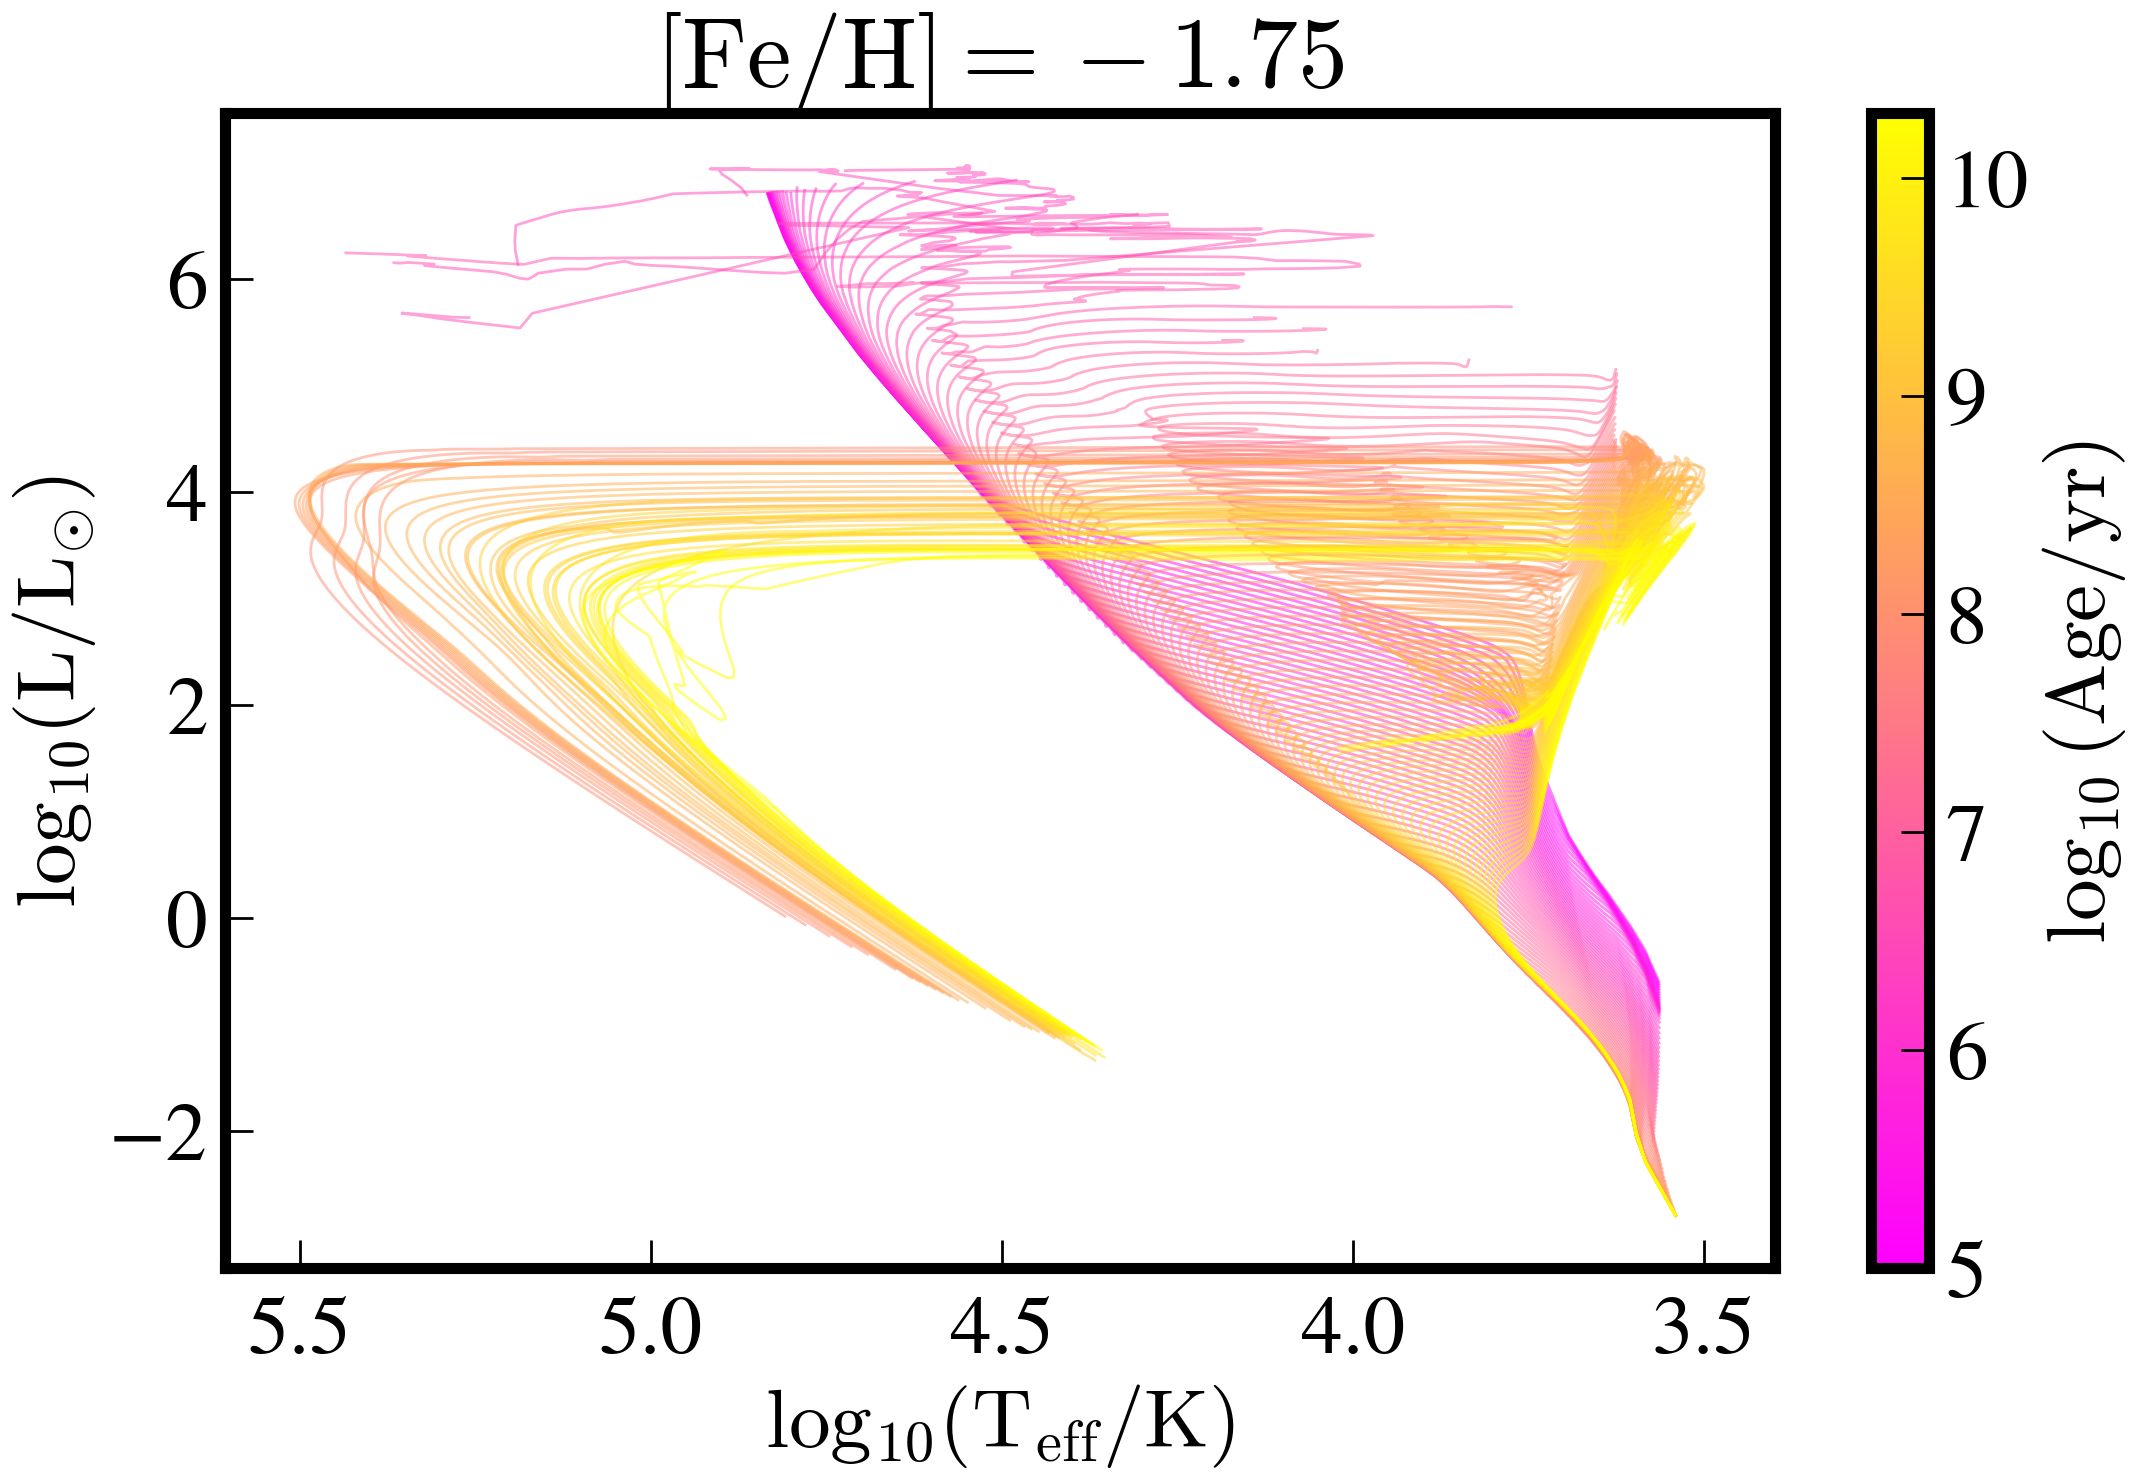

In [7]:
fig, ax = plt.subplots(figsize=(25, 15))

cmap_iso = 'spring'                     # You can adjust this
cmap = cm.get_cmap(cmap_iso)
norm = Normalize(vmin=min(isocmd.ages), vmax=max(isocmd.ages))

for age in isocmd.ages:
    age_ind = isocmd.age_index(age)
    logTeff = isocmd.isocmds[age_ind]['log_Teff']
    logL = isocmd.isocmds[age_ind]['log_L']
    color = cmap(norm(age))
    ax.plot(logTeff, logL,  alpha=0.5, color=color)

plt.gca().invert_xaxis()
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('$\mathrm{\log_{10}(Age/yr)}$')

ax.set_xlabel('$\mathrm{log_{10}(T_{eff}/K)}$')
ax.set_ylabel('$\mathrm{log_{10}(L/L_{\odot})}$')

feh = isocmd.abun['[Fe/H]']
ax.set_title(f'$\mathrm{{[Fe/H]={feh}}}$')
plt.show()

### [Auto] Plot the Color Magnitude Diagram with Synthesis Photometry (SDSS)

/var/folders/01/hylf9pb92xldkhcxp_qjpxvr0000gn/T/ipykernel_97167/3382269195.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('spring')


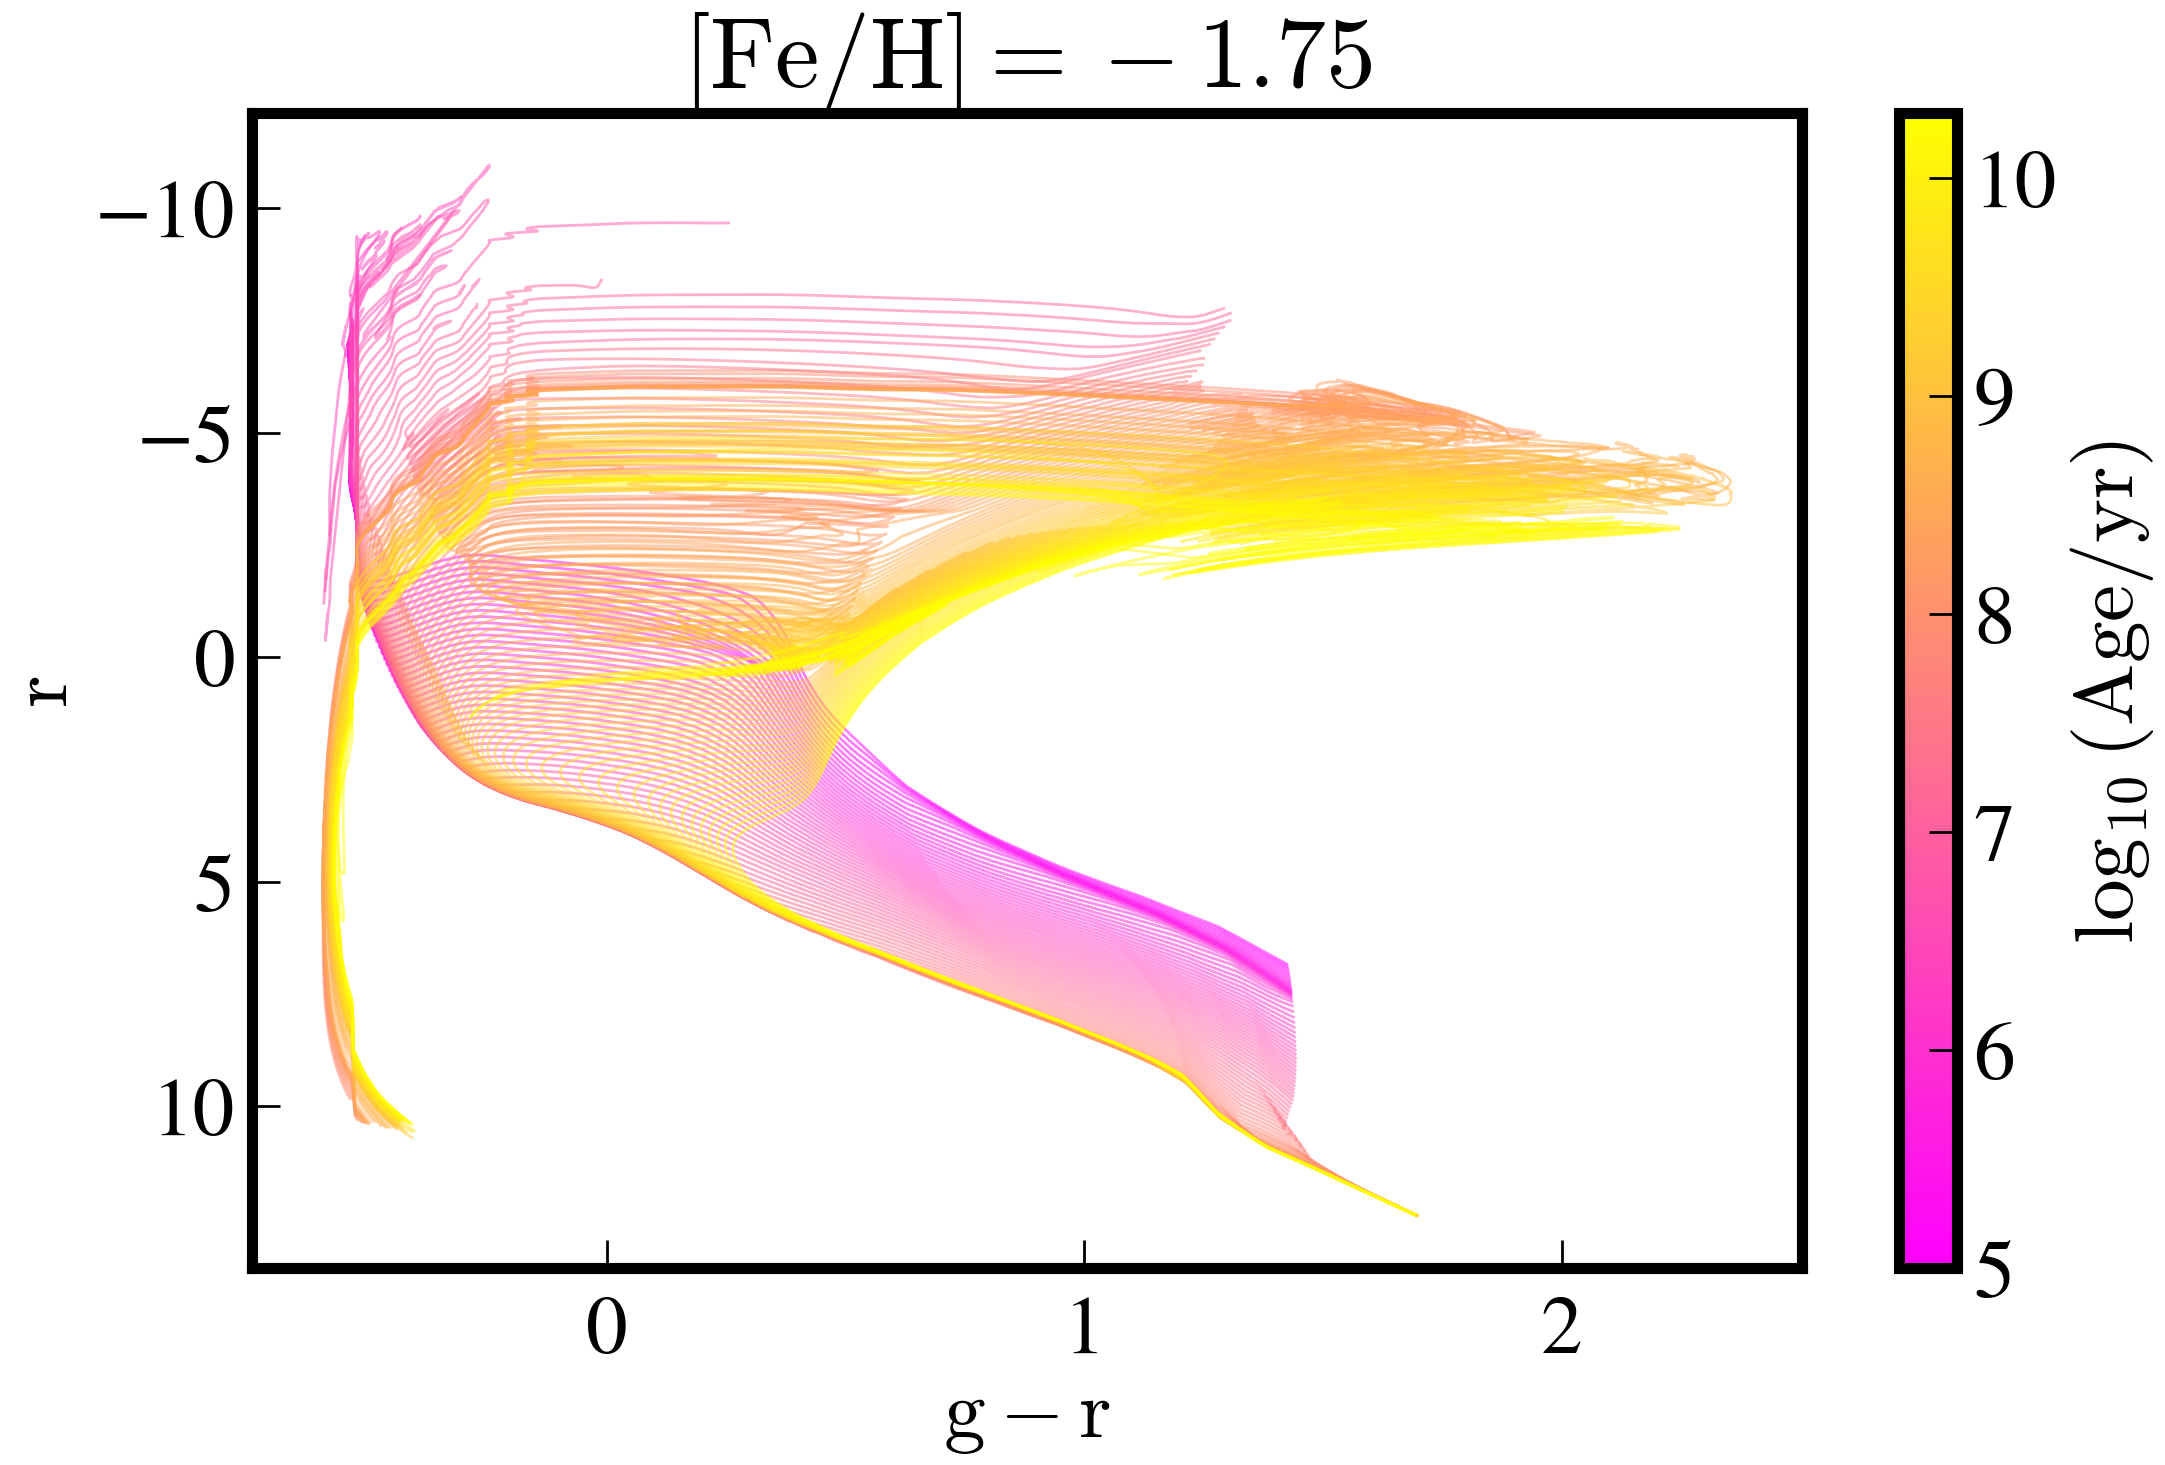

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))

cmap = cm.get_cmap(cmap_iso)
norm = Normalize(vmin=min(isocmd.ages), vmax=max(isocmd.ages))

for age in isocmd.ages:
    age_ind = isocmd.age_index(age)
    g = isocmd.isocmds[age_ind]['SDSS_g']
    r = isocmd.isocmds[age_ind]['SDSS_r']
    color = cmap(norm(age))
    ax.plot(g-r, r,  alpha=0.5, color=color)

plt.gca().invert_yaxis()
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('$\mathrm{\log_{10}(Age/yr)}$')

ax.set_xlabel('$\mathrm{g-r}$')
ax.set_ylabel('$\mathrm{r}$')

feh = isocmd.abun['[Fe/H]']
ax.set_title(f'$\mathrm{{[Fe/H]={feh}}}$')
plt.show()

### [Auto] Plot the function of Teff-color, L-magnitude relations

/var/folders/01/hylf9pb92xldkhcxp_qjpxvr0000gn/T/ipykernel_97167/528388426.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_iso)


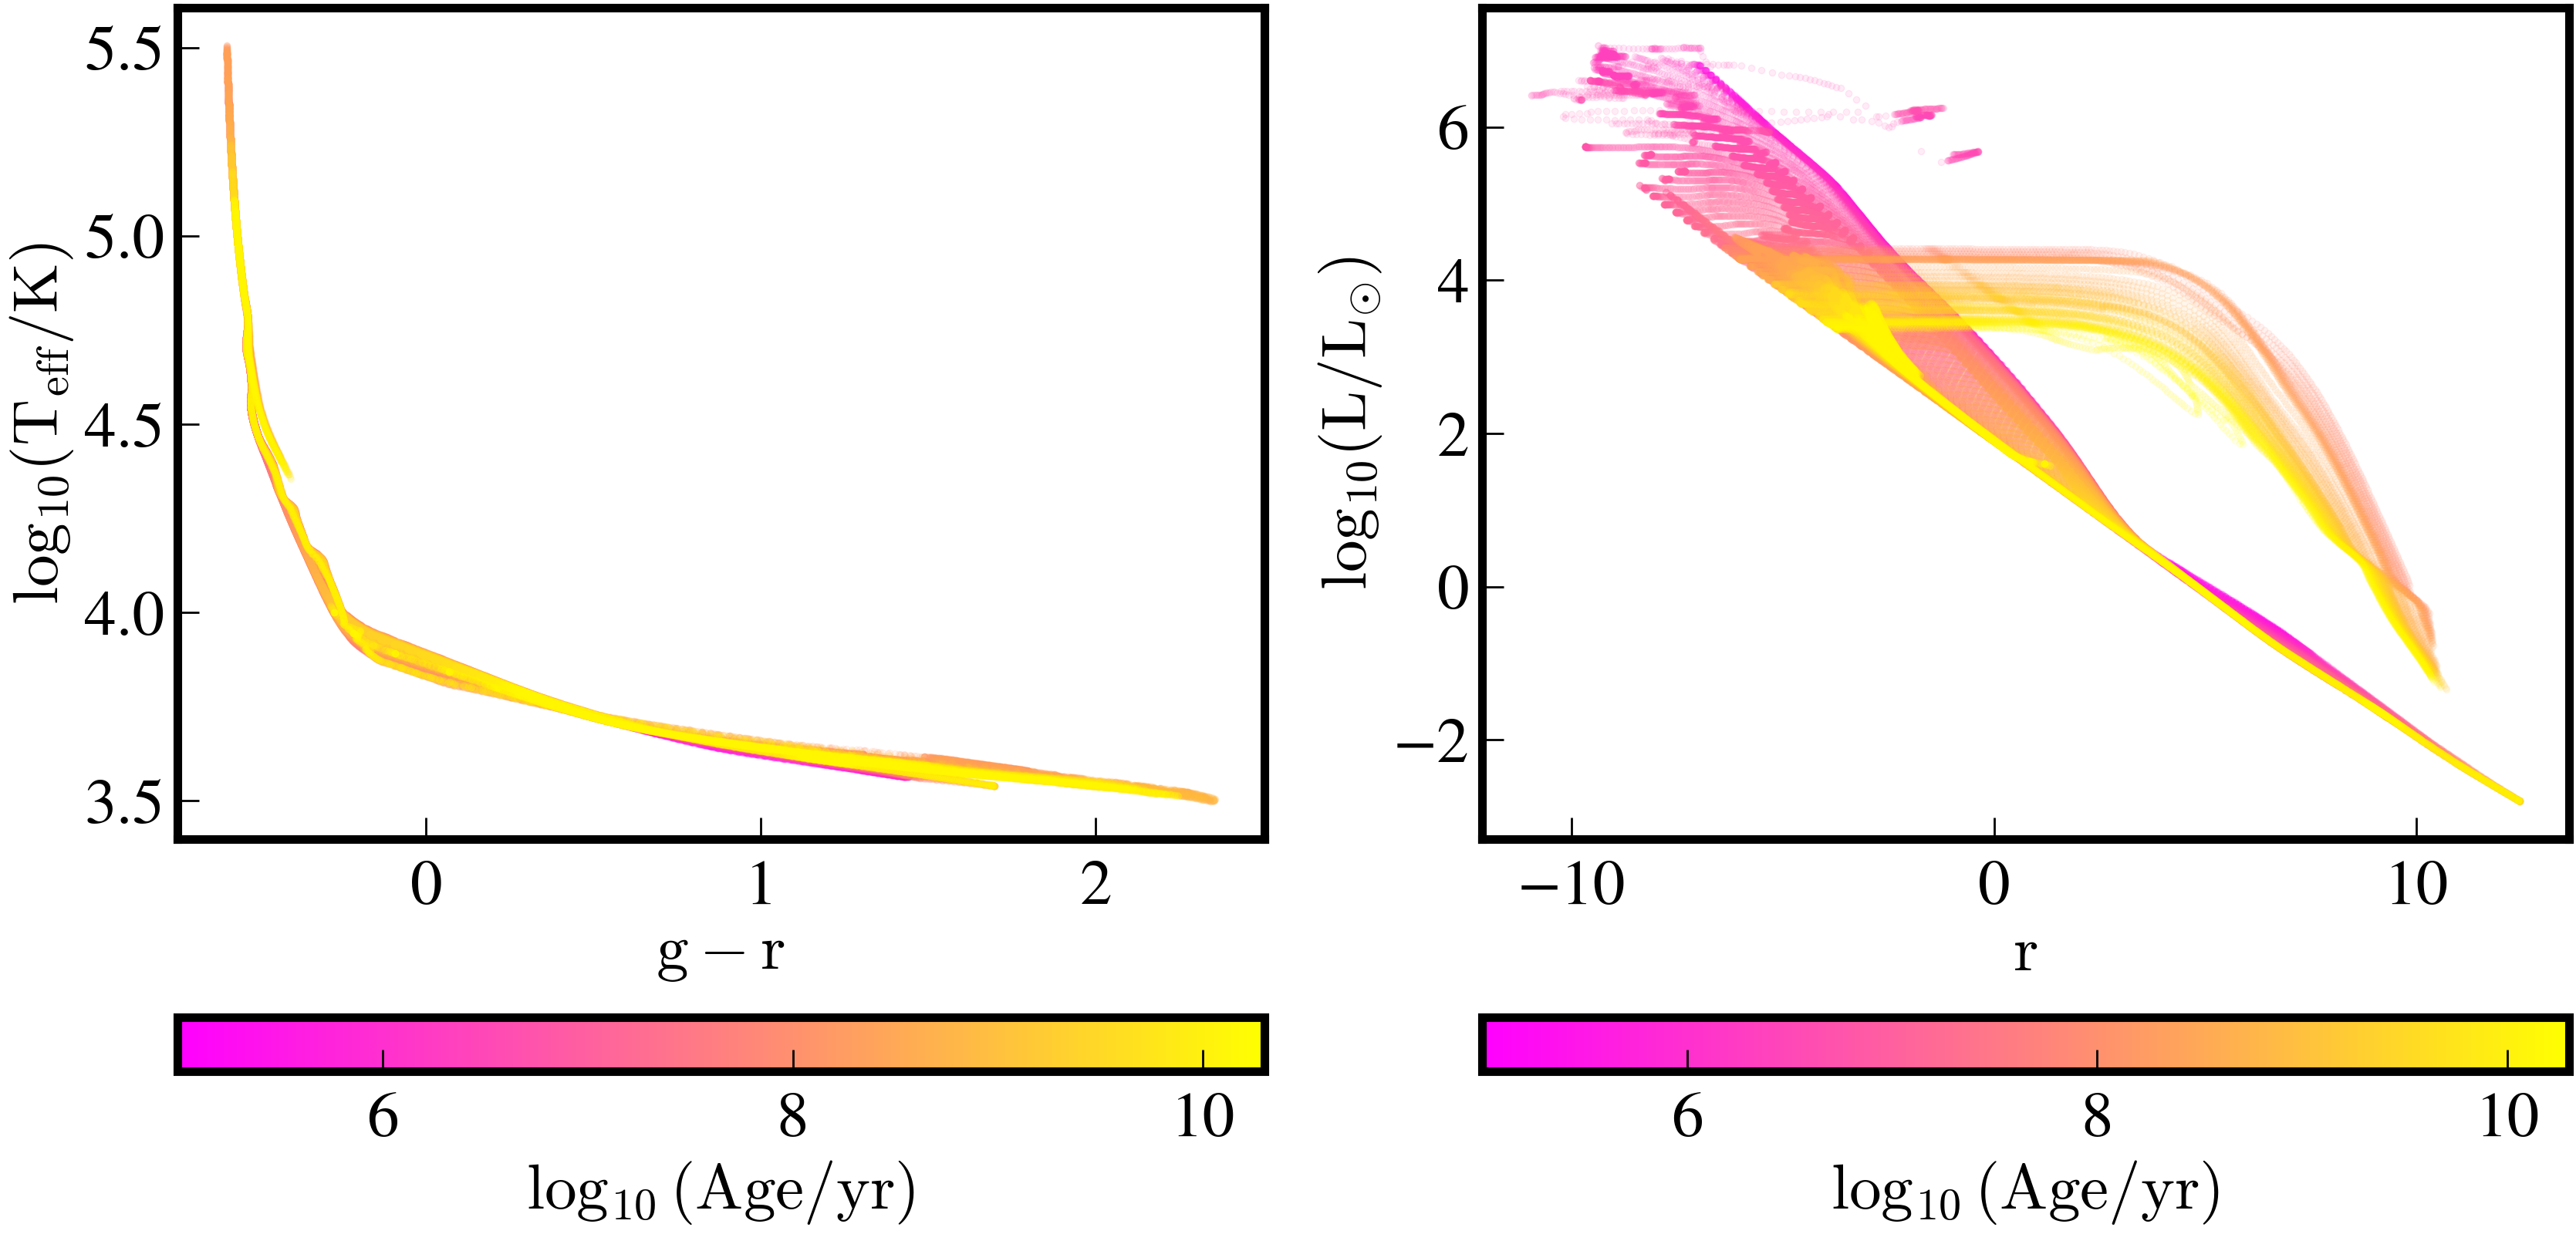

In [75]:
fig = plt.figure(figsize=(40, 20))
ax1, ax2 = fig.add_subplot(1, 2, 1), fig.add_subplot(1, 2, 2)

cmap = cm.get_cmap(cmap_iso)
norm = Normalize(vmin=min(isocmd.ages), vmax=max(isocmd.ages))

for age in isocmd.ages:
    age_ind = isocmd.age_index(age)
    g = isocmd.isocmds[age_ind]['SDSS_g']
    r = isocmd.isocmds[age_ind]['SDSS_r']
    logTeff = isocmd.isocmds[age_ind]['log_Teff']
    logL = isocmd.isocmds[age_ind]['log_L']
    color = cmap(norm(age))
    ax1.scatter(g-r, logTeff,  alpha=0.1, color=color)
    ax2.scatter(r, logL,  alpha=0.1, color=color)

ax1.set_xlabel('$\mathrm{g-r}$')
ax2.set_xlabel('$\mathrm{r}$')
ax1.set_ylabel('$\mathrm{log_{10}(T_{eff}/K)}$')
ax2.set_ylabel('$\mathrm{log_{10}(L/L_{\odot})}$')

sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1, orientation='horizontal')
cbar.set_label('$\mathrm{\log_{10}(Age/yr)}$')
cbar = plt.colorbar(sm, ax=ax2, orientation='horizontal')
cbar.set_label('$\mathrm{\log_{10}(Age/yr)}$')

plt.show()

### [Auto] Load the CMD you made

In [14]:
b0, b1, mag_idx, bm = 'g', 'r', 1, 'r'

cmd = pd.read_csv(f'./koposov36_{b0}_{b1}.csv')
cmd.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [15]:
cmd.head(5)

,x_g,y_g,x_r,y_r,ra_g,dec_g,ra_r,dec_r,mag_g,mag_r
0,1252.351952,15.285963,1248.782851,3.507142,84.097786,31.193098,84.097787,31.193101,19.582877,18.156043
1,662.911377,16.646236,659.447782,4.701242,84.138698,31.138541,84.138697,31.138529,20.932445,19.040868
2,1082.913203,17.443986,1079.400947,5.489902,84.109743,31.177521,84.109727,31.177515,19.973394,18.697421
3,91.005886,17.417743,87.738983,5.584725,84.178288,31.085562,84.178309,31.085561,16.426038,18.328615
4,1682.968322,28.404492,1679.156785,16.726569,84.069398,31.233782,84.069409,31.233780,20.878002,19.996716


### [Mission 1] Choose the proper age

- 성단의 log Age를 입력하여 isochrone을 적용해 보시기 바랍니다

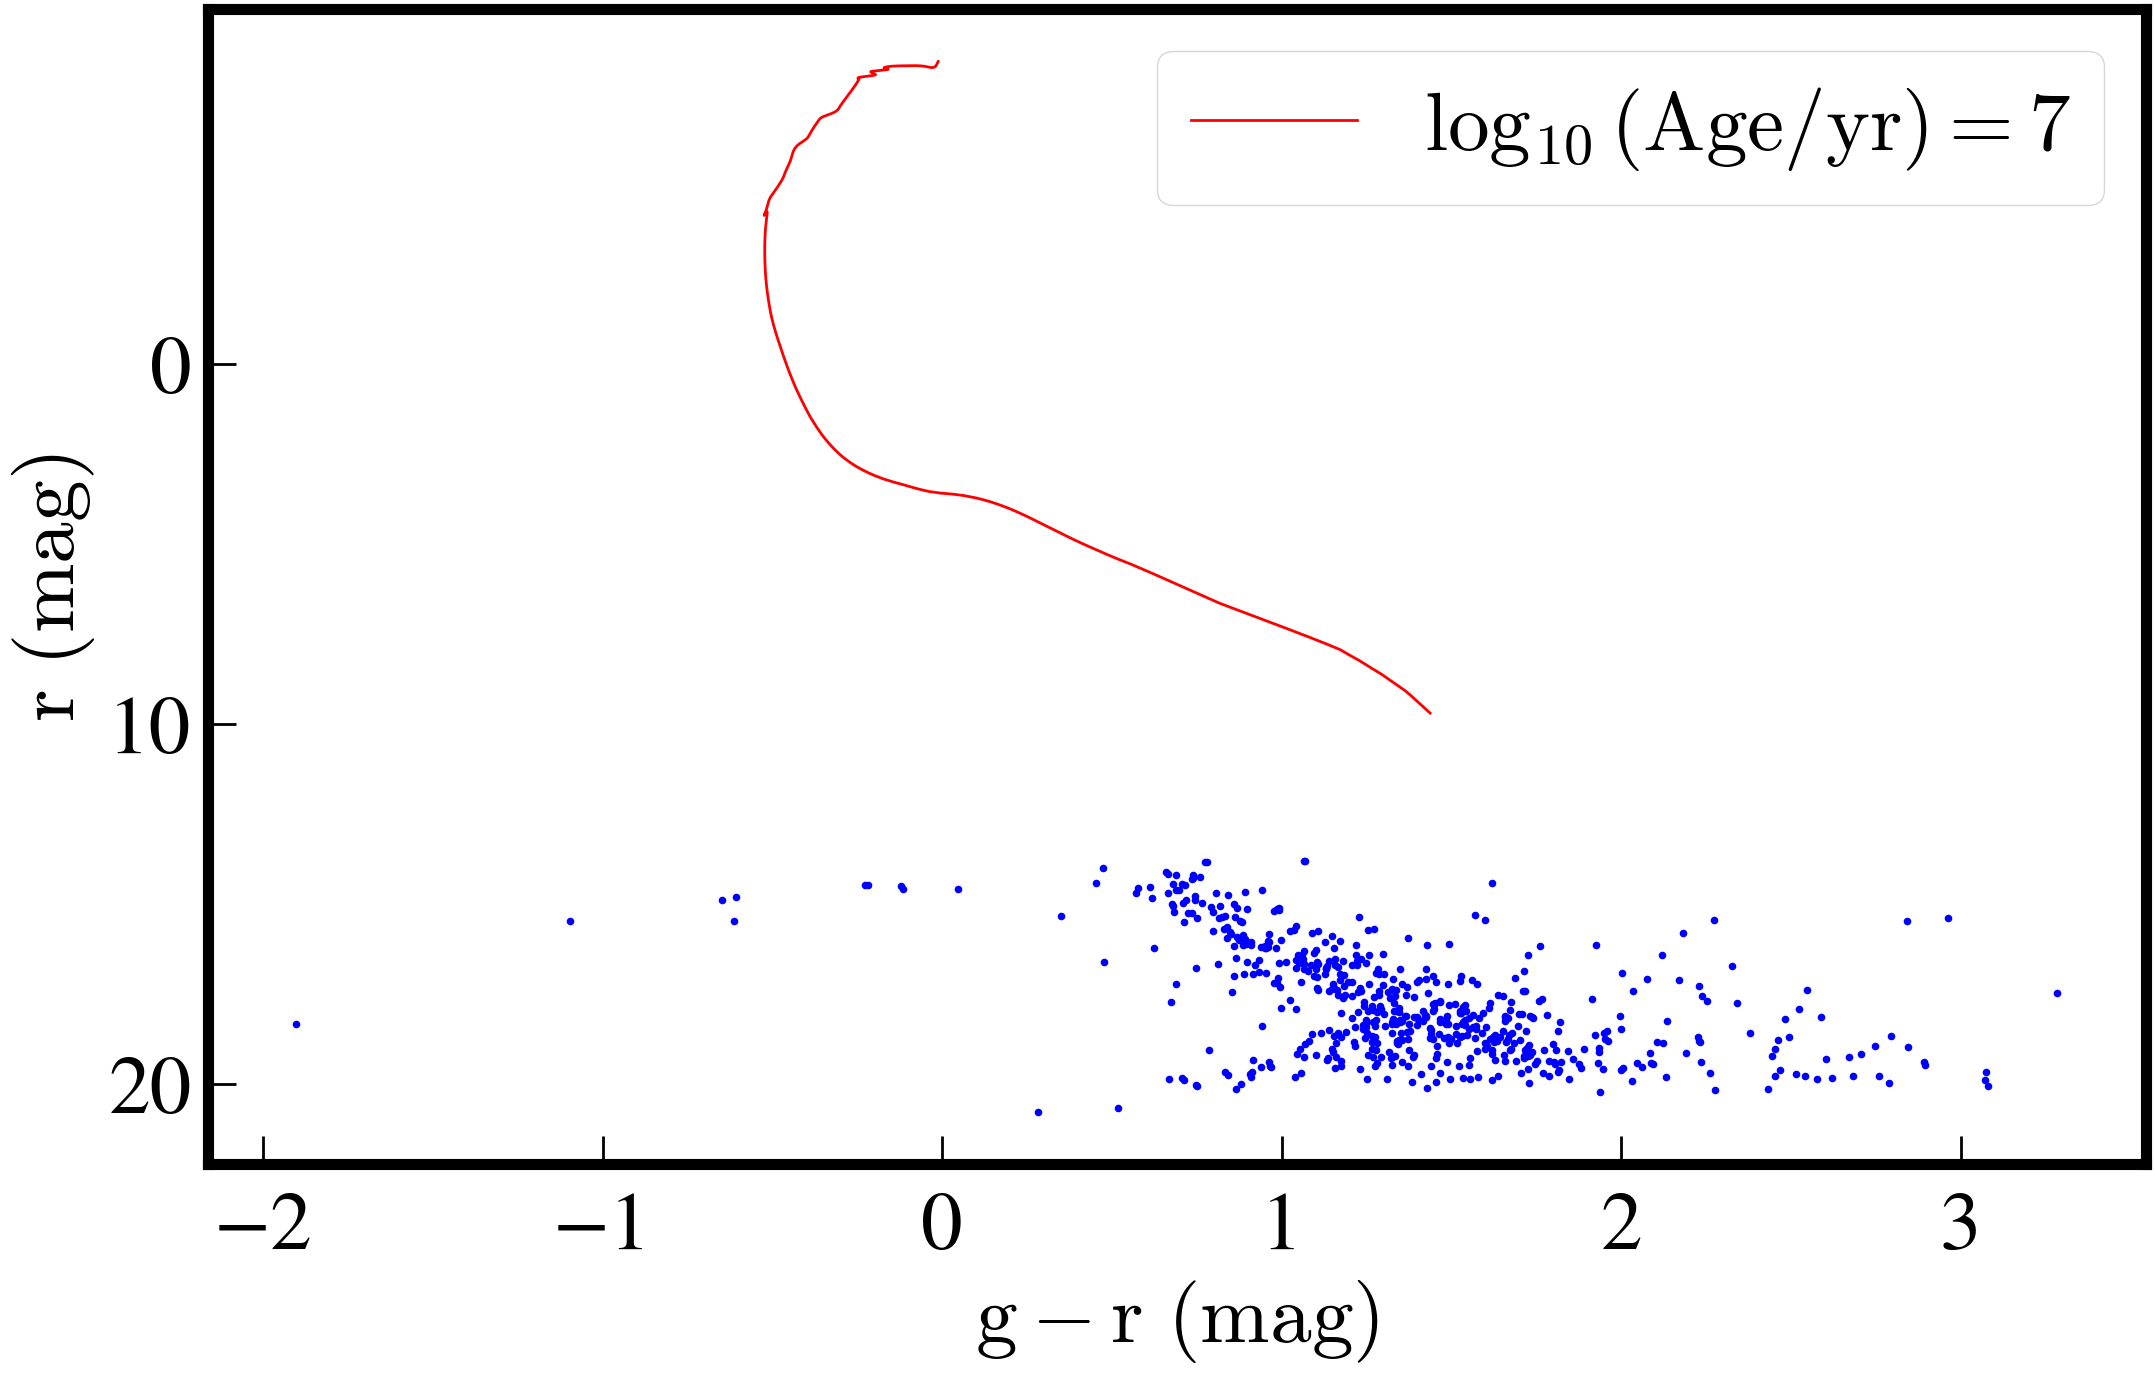

In [16]:
age_choose = 7                        # You should fix this
age_ind = isocmd.age_index(age_choose)

b0_iso = isocmd.isocmds[age_ind][f'SDSS_{b0}']
b1_iso = isocmd.isocmds[age_ind][f'SDSS_{b1}']
b0_obs = np.array(cmd[f'mag_{b0}'])
b1_obs = np.array(cmd[f'mag_{b1}'])

fig, ax = plt.subplots(figsize=(25, 15))

if mag_idx==1:
    ax.scatter(b0_obs - b1_obs, b1_obs, marker='o', color='blue', s=20)
    ax.plot(b0_iso - b1_iso, b1_iso, c='red', label=f'$\mathrm{{\log_{{10}}(Age/yr)={age_choose}}}$') 
elif mag_idx==0:
    ax.scatter(b0_obs - b1_obs, b0_obs, marker='o', color='blue', s=20)
    ax.plot(b0_iso - b1_iso, b0_iso, c='red', label=f'$\mathrm{{\log_{{10}}(Age/yr)={age_choose}}}$') 

ax.set_xlabel(f'$\mathrm{{{b0}-{b1}\ (mag)}}$')
ax.set_ylabel(f'$\mathrm{{{bm}\ (mag)}}$')
ax.legend()
plt.gca().invert_yaxis()
plt.show()

### [Mission 2] Find the proper distance modulus

- $\rm \mu\ =\ m\ -\ M\ =\ 5log_{10}(d/pc)-5$

- 적절한 distance modulus ($\mu$)를 적용하여 측정한 CMD와 isochrone curve가 맞게 조정해보시기 바랍니다.

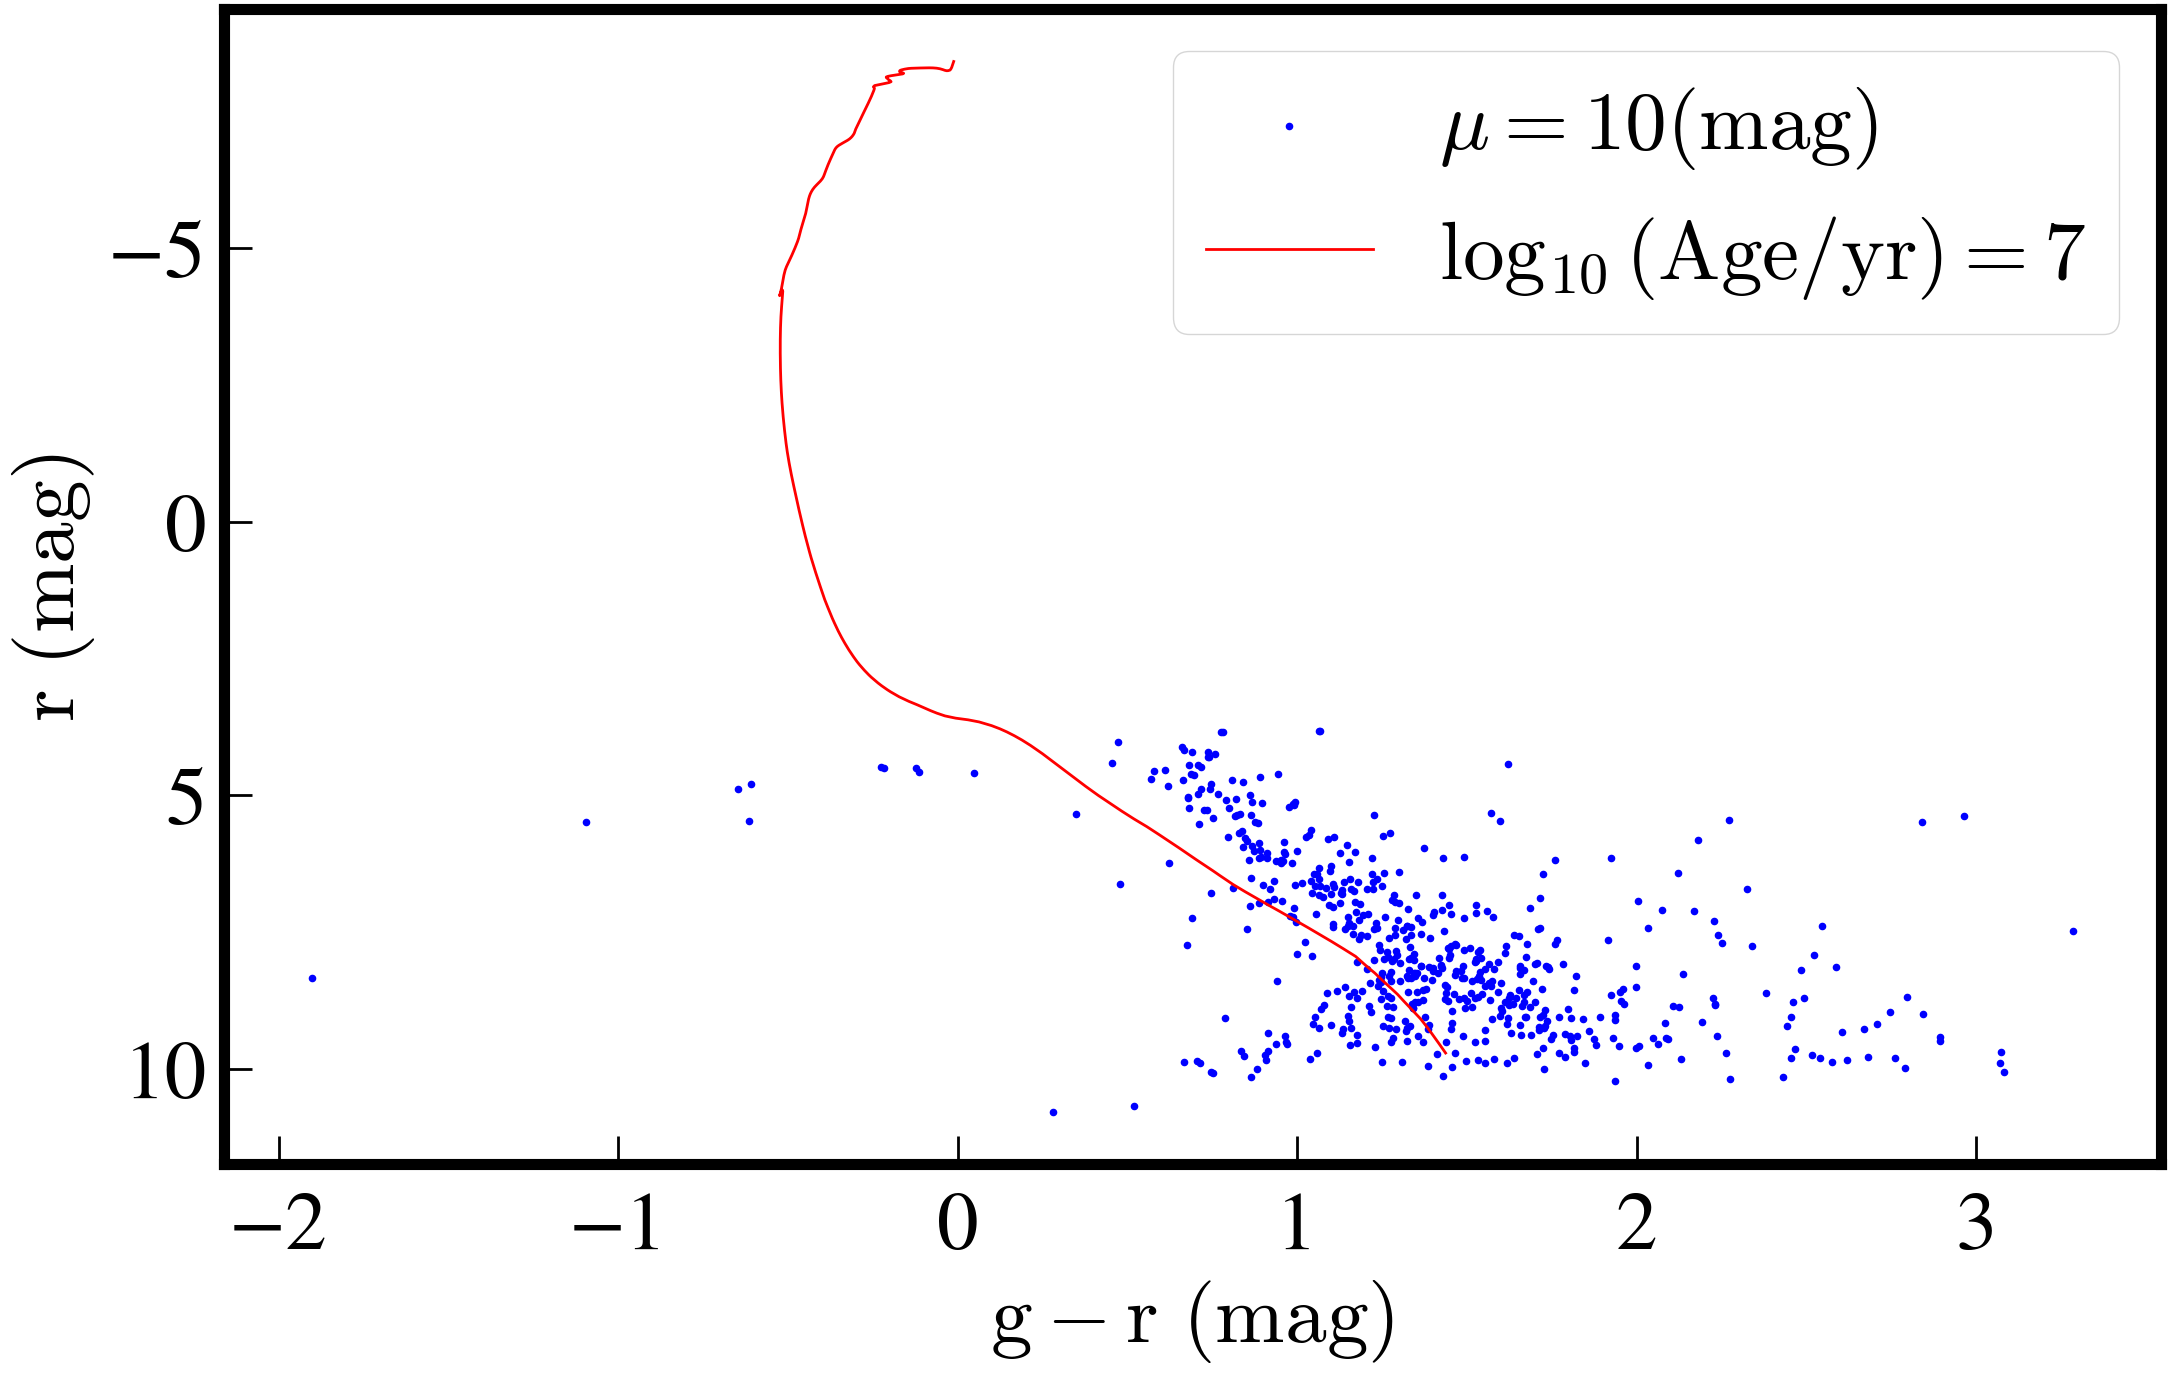

In [17]:
mu = 10                        # You should fix this

fig, ax = plt.subplots(figsize=(25, 15))

if mag_idx==1:
    ax.scatter(b0_obs - b1_obs, b1_obs - mu, marker='o', color='blue', s=20, label=f'$\mu={mu}\mathrm{{(mag)}}$')
    ax.plot(b0_iso - b1_iso, b1_iso, c='red', label=f'$\mathrm{{\log_{{10}}(Age/yr)={age_choose}}}$') 
elif mag_idx==0:
    ax.scatter(b0_obs - b1_obs, b0_obs - mu, marker='o', color='blue', s=20, label=f'$\mu={mu}\mathrm{{(mag)}}$')
    ax.plot(b0_iso - b1_iso, b0_iso, c='red', label=f'$\mathrm{{\log_{{10}}(Age/yr)={age_choose}}}$') 

ax.set_xlabel(f'$\mathrm{{{b0}-{b1}\ (mag)}}$')
ax.set_ylabel(f'$\mathrm{{{bm}\ (mag)}}$')
ax.legend()
plt.gca().invert_yaxis()
plt.show()

### [Mission 3] Find the proper distance with $\chi^2$ minimization

- 적절한 distance modulus를 통해 성단의 여러 '가능'한 age를 입력하여 각각의 $\chi^2$값을 추정하고 최소화되는 지점을 찾아 성단의 나이를 추정하시기 바랍니다.

- 참고: $\chi^2$ minimization이란?
    - $\chi^2=\Sigma\left(\frac{X-\bar{X}}{\sigma}\right)^2$

    - $\chi^2$값이 작을수록 'model'이 실제 데이터를 잘 예측하고 있음을 보여줌

    - 즉 'Age' parameter를 다르게 한 각각의 isochrone 'model'이 실제 CMD data을 얼마나 잘 예측하는지 추정하는 방법

    - 그러나 $\chi^2$값이 작다고 그 model이 무조건 맞다는 뜻은 아님, data에 systematical한 bias가 있을 때는 model의 적합도가 정답이 되어주지 못함
    
    - 해당 노트북 파일에서는 Color - Magnitude Diagram을 2차원 grid로 나누어 각 grid의 대푯값 (평균, 표준편차)들을 사용하여 $\chi^2$ minimization을 적용함

In [18]:
def chisq_cal(c_obs, c_iso, c_err, m_obs, m_iso, m_err):
    chisq = 0
    for c, ce, m, me in zip(c_obs, c_err, m_obs, m_err):
        d = ((c - c_iso) / ce) ** 2 + ((m - m_iso) / me) ** 2
        chisq += min(d)
    return chisq

def binned_stats2d(x, y, x_bins=10, y_bins=10):
    x = np.asarray(x)
    y = np.asarray(y)
    x_edges = np.linspace(x.min(), x.max(), x_bins + 1)
    y_edges = np.linspace(y.min(), y.max(), y_bins + 1)

    ix = np.digitize(x, x_edges) - 1
    iy = np.digitize(y, y_edges) - 1

    xc, yc = [], []
    mx, my = [], []
    sx, sy = [], []

    for i in range(x_bins):
        for j in range(y_bins):
            mask = (ix == i) & (iy == j)
            count = mask.sum()
            if count >= 3:
                xs = x[mask]
                ys = y[mask]
                xc.append(0.5 * (x_edges[i] + x_edges[i+1]))
                yc.append(0.5 * (y_edges[j] + y_edges[j+1]))
                mx.append(xs.mean())
                my.append(ys.mean())
                sx.append(xs.std(ddof=1))
                sy.append(ys.std(ddof=1))

    return {
        'mean_c'  : np.array(mx),
        'mean_m'  : np.array(my),
        'std_c'   : np.array(sx),
        'std_m'   : np.array(sy),
    }

8.655172413793103


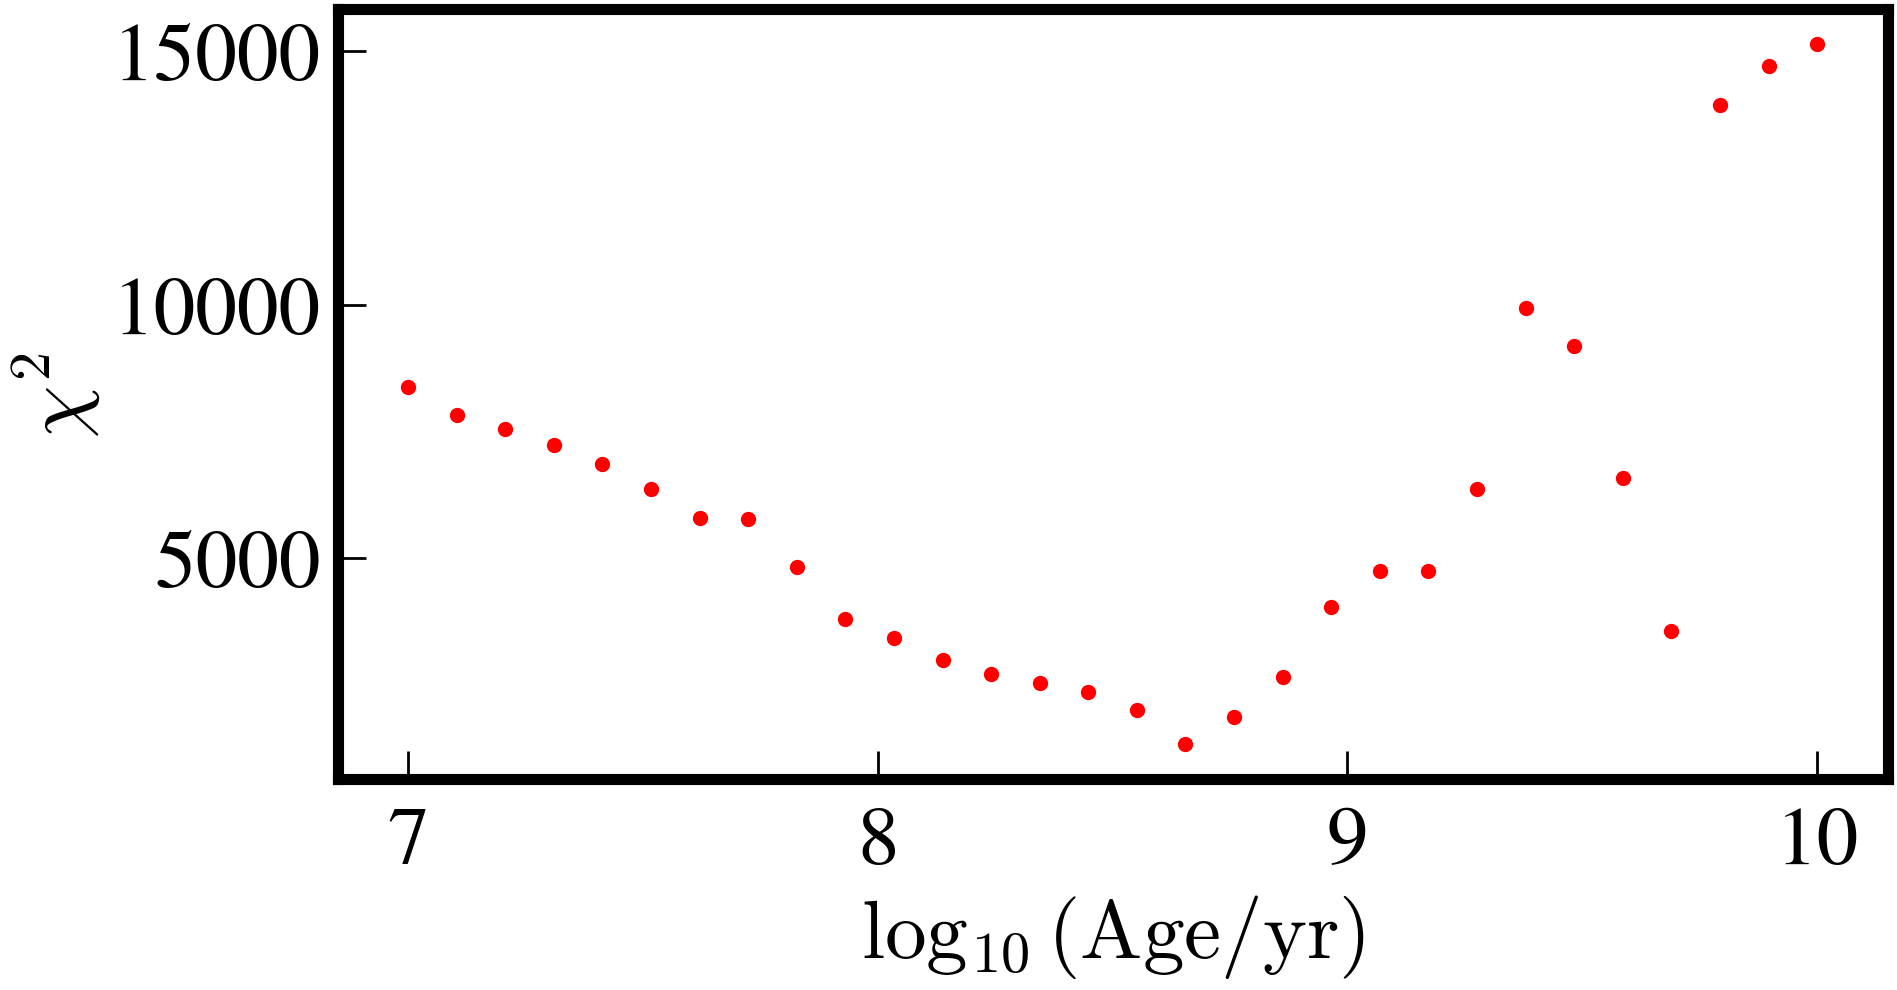

In [23]:
age_arr = np.linspace(7.0, 10, 30)  # You should fix this

chisq_age = []

result = binned_stats2d(b0_obs - b1_obs, b1_obs - mu)

for age in age_arr:
    age_ind = isocmd.age_index(age)
    b0_iso_chi = isocmd.isocmds[age_ind][f'SDSS_{b0}']
    b1_iso_chi = isocmd.isocmds[age_ind][f'SDSS_{b1}']
    
    chisq = chisq_cal(result['mean_c'], b0_iso_chi - b1_iso_chi, 
                      result['std_c'], 
                      result['mean_m'] - mu, b1_iso_chi, result['std_m'])
    chisq_age.append(chisq)
    
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(age_arr, chisq_age, color='red', s=100)
ax.set_xlabel('$\mathrm{\log_{10}(Age/yr)}$')
ax.set_ylabel('$\mathrm{\chi^2}$')
print(age_arr[np.argmin(chisq_age)])

### [Bonus] Age - Distance modulus $\chi^2$ minimization

- 2개의 parameter를 동시에 다루는 코드를 추가했으니 참고하시기 바랍니다. 

/var/folders/01/hylf9pb92xldkhcxp_qjpxvr0000gn/T/ipykernel_63658/3880911957.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


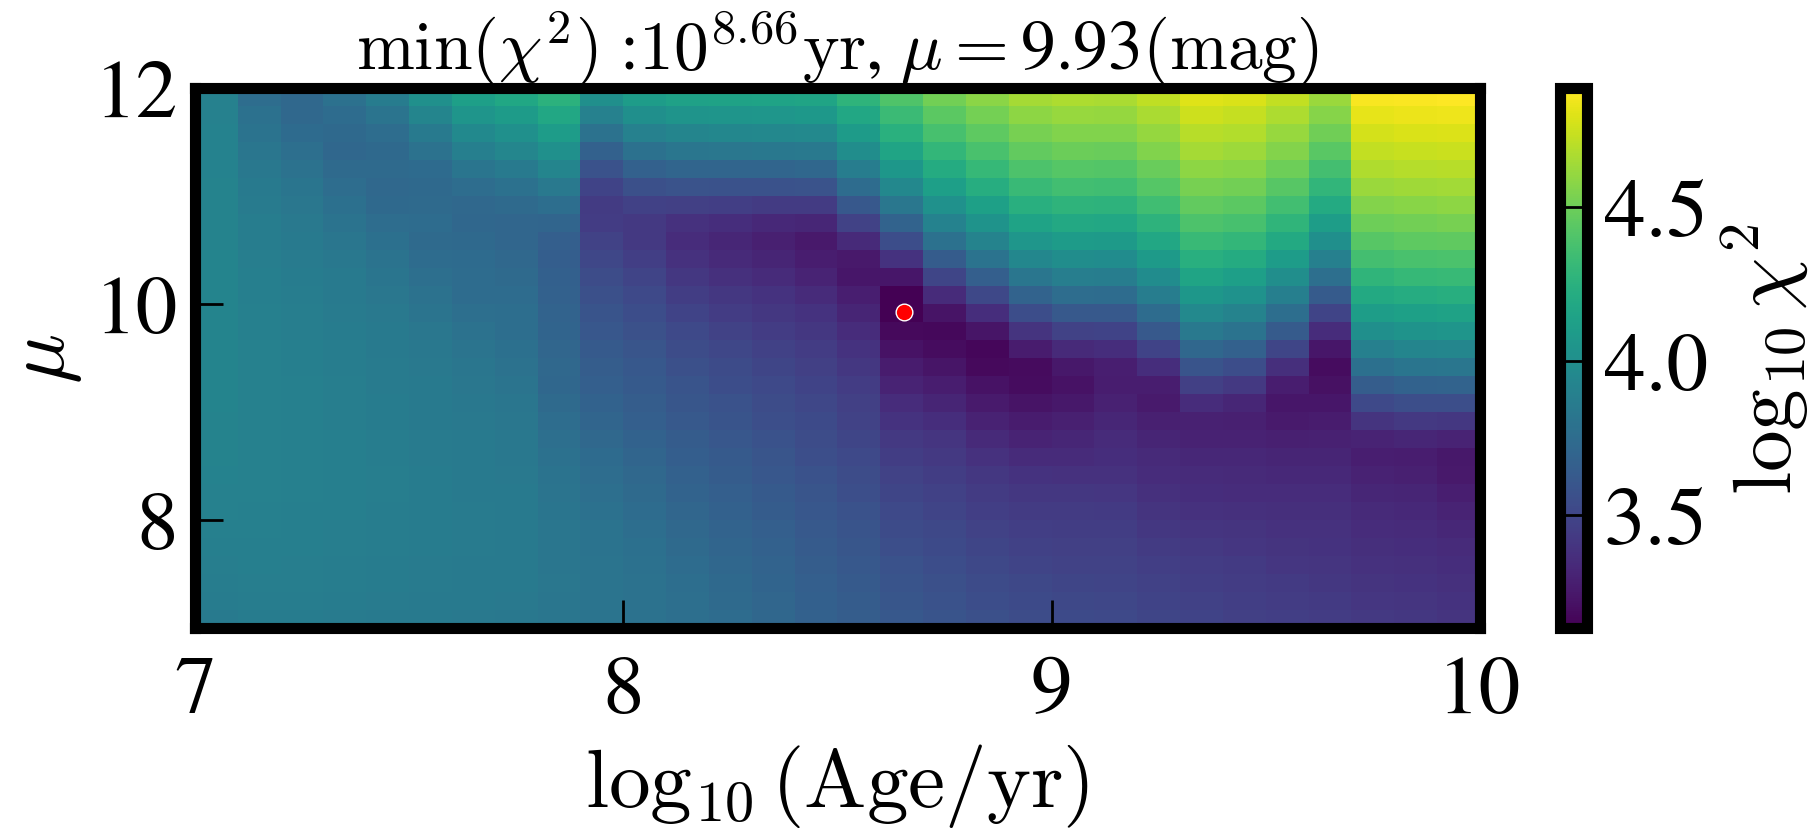

In [53]:
mu_arr = np.linspace(7, 12, 30)
age_arr = np.linspace(7.0, 10, 30)

chisq_arr = []

for age in age_arr:
    age_ind = isocmd.age_index(age)
    chisq_age = []
    
    for mu in mu_arr:
        b0_iso_chi = isocmd.isocmds[age_ind][f'SDSS_{b0}']
        b1_iso_chi = isocmd.isocmds[age_ind][f'SDSS_{b1}']
        
        chisq = chisq_cal(result['mean_c'], b0_iso_chi - b1_iso_chi, 
                          result['std_c'], result['mean_m'] - mu, b1_iso_chi, result['std_m'])
        chisq_age.append(chisq)
    chisq_arr.append(chisq_age)
    
chisq_arr = np.array(chisq_arr)
    
cmap = cm.get_cmap('viridis')
norm = Normalize(vmin=np.log10(chisq_arr).min(), vmax=np.log10(chisq_arr).max())

fig, ax = plt.subplots(figsize=(20, 10))
im = ax.imshow(
    np.log10(chisq_arr.T),
    origin='lower',
    aspect='auto',
    extent=[age_arr.min(), age_arr.max(),
            mu_arr.min(), mu_arr.max()],
    cmap=cmap,
    norm=norm
)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('$\log_{10}\chi^2$')

min_idx = np.unravel_index(np.argmin(chisq_arr), chisq_arr.shape)
age_min = age_arr[min_idx[0]]
mu_min  = mu_arr[min_idx[1]]

ax.plot(age_min, mu_min, 'o', color='red', markersize=12,
        markeredgecolor='white', markeredgewidth=1)
ax.set_title(f'$\min(\chi^2)$ :$10^{{{age_min:.2f}}}\mathrm{{yr}}$, $\mu=${mu_min:.2f}$\mathrm{{(mag)}}$', 
             fontsize=50)
ax.set_xlabel('$\mathrm{\log_{10}(Age/yr)}$')
ax.set_ylabel('$\mu$')
plt.tight_layout()
plt.show()

### Additional Thinking (Not duty)

- Metalicity에 따라 isochrone curve가 어떻게 바뀔까?

- Isochrone의 어떤 setting이 제공된 CMD data와 잘 맞는다고 어떻게 이야기할 수 있을까?

- 제공된 CMD의 모든 data point가 목표로 하는 성단의 별임을 어떻게 확신할 수 있을까? 

- 성단의 별이 모두 같은 시점에 탄생했음을 어떻게 확신할 수 있을까?

- 성간 적색화를 어떻게 고려할 수 있을까?